In [0]:
import numpy as np
import pandas as pd
import string
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import torch
from torch.autograd import variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [0]:
dinoFile = './Dinos.txt'

In [0]:
dinosDF = pd.read_csv(dinoFile, header = None, names=['Name'])

In [0]:
def editDF(dataframe):
    for index, row in dataframe.iterrows():
        text = row[0]
        lower = text.lower()
        noPunc = ""
        for char in lower:
            if char not in string.punctuation:
                noPunc += char
        dataframe.loc[index,'data'] = noPunc
    return dataframe

In [5]:
dinosDF.describe()

,Name
count,1325
unique,1318
top,titanosaurus
freq,2


In [0]:
dinosDFWithStop = dinosDF.apply(lambda x: x+'#')

In [0]:
dinosList = dinosDFWithStop.apply(lambda x: list(x))

In [8]:
dinosList

,Name
0,aachenosaurus#
1,aardonyx#
2,abelisaurus#
3,abrictosaurus#
4,abrosaurus#
5,abydosaurus#
6,acanthopholis#
7,achelousaurus#
8,acheroraptor#
9,achillesaurus#


In [0]:
temp = dinosList.values.tolist()

In [10]:
maxNameLength = 0
for element in temp:
  length = len(element[0])
  #print(length)
  if length > maxNameLength:
    maxNameLength = length
print(maxNameLength)

24


In [0]:
#charList = []
#def createCharList(dataframe, charList):
#  for index, row in dataframe.iterrows():
#    text = row[0]
#    for char in text:
#      if char not in charList:
#        charList.append(char)
#  return charList

In [0]:
#charList = createCharList(dinosList, charList)

In [0]:
#charList

In [0]:
chars = [char for List in temp for name in List for char in name]

In [15]:
len(chars)

16961

In [0]:
uniqueChars = list(set(chars))
numChars = len(uniqueChars)

In [0]:
sortedUniqueChars = sorted(uniqueChars)

In [18]:
sortedUniqueChars

['#',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [0]:
def OneHotEncoder(text, sortedUniqueChars):
  charCounter = 0
  oheNameMatrix = np.zeros((len(text), len(sortedUniqueChars)))
  for char in text:
    oheCharRow = np.zeros((1, len(sortedUniqueChars)))
    #insertIndex = np.where(sortedUniqueChars==char) #not good no work
    insertIndex = sortedUniqueChars.index(char)
    oheCharRow[0,insertIndex] = 1
    oheNameMatrix[charCounter,:] = oheCharRow
    charCounter += 1
  return oheNameMatrix

In [0]:
oheNames = []
for name in temp:
  text = name[0]
  oheNames.append(OneHotEncoder(text, sortedUniqueChars))
#for name in temp:
#  text = name[0]
#  charCounter = 0
#  oheNameMatrix = np.zeros((len(text), len(sortedUniqueChars)))
#  for char in text:
#    oheCharRow = np.zeros((1, len(sortedUniqueChars)))
#    insertIndex = np.where(sortedUniqueChars==char)
#    oheCharRow[insertIndex[0]] = 1
#    oheNameMatrix[charCounter,:] = oheCharRow
#    charCounter += 1
#  oheNames.append(oheNameMatrix)

In [0]:
#oheNames
#for name in oheNames:
#  print(name.shape)

In [0]:
#sortedUniqueChars

In [23]:
w1 = variable(torch.FloatTensor(np.random.randn(numChars+numChars, numChars)), requires_grad = True)
b1 = variable(torch.FloatTensor(np.random.randn(1,numChars)), requires_grad = True)
w2 = variable(torch.FloatTensor(np.random.randn(numChars, numChars)), requires_grad = True)
b2 = variable(torch.FloatTensor(np.random.randn(1,numChars)), requires_grad = True)
w3 = variable(torch.FloatTensor(np.random.randn(numChars, numChars)), requires_grad = True)
b3 = variable(torch.FloatTensor(np.random.randn(1,numChars)), requires_grad = True)

/usr/local/lib/python3.6/dist-packages/torch/autograd/__init__.py:167: UserWarning: torch.autograd.variable(...) is deprecated, use torch.tensor(...) instead
  warnings.warn("torch.autograd.variable(...) is deprecated, use torch.tensor(...) instead")
/usr/local/lib/python3.6/dist-packages/torch/autograd/__init__.py:168: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(*args, **kwargs)


In [0]:
def cycle(hidden, inputs):
  h_t = torch.tanh(torch.mm(torch.cat([inputs,hidden], dim = 1), w1)+b1)
  out = torch.mm(torch.tanh(torch.mm(h_t,w2)+b2),w3)+b3
  return h_t, out

def forward(x, init = None):
  lenSeq = x.size(0)
  hiddens = []
  outs = []
  
  if init == None:
    h_t = torch.zeros(1, x.size(1))
  else:
    h_t = init
  
  for i in range(lenSeq):
    h_t, out = cycle(h_t, x[[i]])
    hiddens.append(h_t)
    outs.append(out)
  
  hiddenSeq = torch.cat(hiddens)
  outSeq = torch.cat(outs)
  return hiddenSeq, outSeq

In [0]:
optimizer = torch.optim.Adam([w1,w2,w3,b1,b2,b3], lr = .001)

def backward(outputSequence, trueLabels):
  _, targets = trueLabels.max(dim=1)
  loss = torch.nn.CrossEntropyLoss()(outputSequence, targets)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return loss

In [32]:
epochs = 20000
losses = []
for i in range(epochs):
  sample = random.choice(oheNames).tolist()
  x = torch.FloatTensor(sample)
  hid, out = forward(x[0:-1])
  lossVal = backward(out, x[1:])
  losses.append(lossVal)
  if (i+1)%(epochs/100) == 0:
    print('Epochs: {}/{}'.format(i+1, epochs))

Epochs: 200/20000
Epochs: 400/20000
Epochs: 600/20000
Epochs: 800/20000
Epochs: 1000/20000
Epochs: 1200/20000
Epochs: 1400/20000
Epochs: 1600/20000
Epochs: 1800/20000
Epochs: 2000/20000
Epochs: 2200/20000
Epochs: 2400/20000
Epochs: 2600/20000
Epochs: 2800/20000
Epochs: 3000/20000
Epochs: 3200/20000
Epochs: 3400/20000
Epochs: 3600/20000
Epochs: 3800/20000
Epochs: 4000/20000
Epochs: 4200/20000
Epochs: 4400/20000
Epochs: 4600/20000
Epochs: 4800/20000
Epochs: 5000/20000
Epochs: 5200/20000
Epochs: 5400/20000
Epochs: 5600/20000
Epochs: 5800/20000
Epochs: 6000/20000
Epochs: 6200/20000
Epochs: 6400/20000
Epochs: 6600/20000
Epochs: 6800/20000
Epochs: 7000/20000
Epochs: 7200/20000
Epochs: 7400/20000
Epochs: 7600/20000
Epochs: 7800/20000
Epochs: 8000/20000
Epochs: 8200/20000
Epochs: 8400/20000
Epochs: 8600/20000
Epochs: 8800/20000
Epochs: 9000/20000
Epochs: 9200/20000
Epochs: 9400/20000
Epochs: 9600/20000
Epochs: 9800/20000
Epochs: 10000/20000
Epochs: 10200/20000
Epochs: 10400/20000
Epochs: 10600

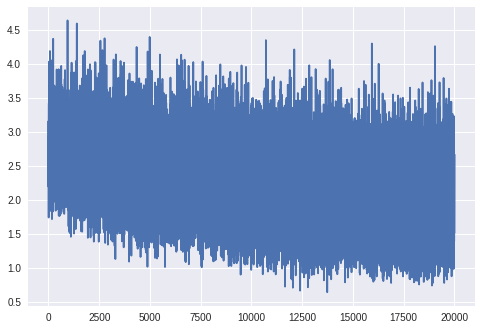

In [33]:
plt.plot(losses)

In [0]:
def generate(startLetter=None, sillyFactor=.01, maxNameLength = 24):
  if startLetter == None:
    startLetter = random.choice(sortedUniqueChars)
  if startLetter == '#':
    return None
  #print(type(startLetter))
  generated = [startLetter]
  start = torch.FloatTensor(OneHotEncoder(startLetter, sortedUniqueChars))

  h_t = torch.randn(1,numChars)*sillyFactor
  h_t,out = cycle(h_t,start)
  out = torch.softmax(out,dim=1)
  _, pos = out.max(dim=1)
  out = torch.zeros(1,numChars)
  out[:,pos]=1
  if sortedUniqueChars[int(pos)] == '#':
      return None
  generated.append(sortedUniqueChars[int(pos)])
  for i in range(maxNameLength):
      h_t,out = cycle(h_t,out)
      _, pos = out.max(dim=1)
      out = torch.zeros(1,numChars)
      out[:,pos]=1
      if sortedUniqueChars[int(pos)] == '#':
          break
      generated.append(sortedUniqueChars[int(pos)])
  return ''.join(generated)

In [37]:
for i in range(20):
  print("No silliness allowed, should call a pretrained \'a\' word")
  print(generate('a', 0))
  print("We want an \'a\' dinosaur with barely any silliness")
  print(generate('a', .01))
  print("Give me something with no input... well default silliness factor is =.01")
  print(generate())
  print("Go bat shit crazy.  Only input is sillyFactor = .8")
  print(generate(sillyFactor = .8))

No silliness allowed, should call a pretrained 'a' word
arcisosaurus
We want an 'a' dinosaur with barely any silliness
arcisasaurus
Give me something with no input... well default silliness factor is =.01
gusasaurus
Go bat shit crazy.  Only input is sillyFactor = .8
xqmxorusisasaurus
No silliness allowed, should call a pretrained 'a' word
arcisosaurus
We want an 'a' dinosaur with barely any silliness
alaosaurus
Give me something with no input... well default silliness factor is =.01
zroosaurus
Go bat shit crazy.  Only input is sillyFactor = .8
tiaaaosaurus
No silliness allowed, should call a pretrained 'a' word
arcisosaurus
We want an 'a' dinosaur with barely any silliness
arceosaurus
Give me something with no input... well default silliness factor is =.01
None
Go bat shit crazy.  Only input is sillyFactor = .8
iqbqqqbqqqqcqqqqqqqqqqqqqq
No silliness allowed, should call a pretrained 'a' word
arcisosaurus
We want an 'a' dinosaur with barely any silliness
ananosaurus
Give me something w